# Advanced Plotting

Previous notebooks [[006_statistics_quickstart](https://github.com/tlint101/py50/blob/main/tutorials/006_statistics_quickstart.ipynb), [007_parametric](https://github.com/tlint101/py50/blob/main/tutorials/007_parametric_example.ipynb), [008_non-parametric](https://github.com/tlint101/py50/blob/main/tutorials/008_non-parametric_example.ipynb)] show some examples of plot modifications. 

This notebook will give further examples for modifying plots. Hopefully users will find a style that they like for that matches their projects. 

py50 wraps [Statannotations](https://github.com/trevismd/statannotations/tree/master), which is built on top of Seaborn and Matplotlib. Many customizations that work for Seaborn and Matplotlib should work for py50 plots. Of course there are tons of customizations and I have not tested them all. If there are issues, please let me know. 

In [1]:
from py50 import Stats, Plots
import seaborn as sns
from matplotlib import pyplot as plt

Load dataset. The Seaborn tips dataset will be used for plotting and generating examples. 

In [2]:
data = sns.load_dataset("tips")

# Initialize Class
tips_stats = Stats(data)

tips_stats.show(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


The Plots() class was written to recalculate the statistics. Essentially, the same statistic result from the Plots() should match with Stats(). As this tutorial will work with Mann-Whitney U tests, the statistics results will be printed here and can be used to check the plot results. 

In [3]:
mannu = tips_stats.get_mannu(value_col='tip', group_col='day')
mannu

,A,B,U-val,p-val,significance,RBC,CLES
0,Sun,Sat,3960.0,0.029497,*,0.197822,0.598911
1,Sun,Thur,2956.5,0.010006,*,0.254881,0.627441
2,Sun,Fri,910.5,0.079741,n.s.,0.261080,0.630540
3,Sat,Thur,2907.5,0.417663,n.s.,0.078050,0.539025
4,Sat,Fri,845.0,0.881937,n.s.,0.022384,0.511192
5,Thur,Fri,561.0,0.758381,n.s.,-0.047538,0.476231


## Plot Test Types

py50 includes plotting for 4 types of plots -> boxplot, barplot, violinplot, and swarmplot

All plots essentially take in the same parameters. At least four parameters are needed to generate the plot. The plots are essentially "re-running" the statistics, so each plot has to be notified for a specific test. 

**Reminders for tests** can be called using the following function:  

In [4]:
Plots.list_test()

List of tests available for plotting: 'tukey', 'gameshowell', 'pairwise-parametric', 'pairwise-rm', 'pairwise-mixed', 'pairwise-nonparametric', 'wilcoxon', 'mannu', 'kruskal''kruskal'


## Basic Plot

Because all the plots use the same parameters, the plot types will be periodically switched in this notebook. Only the barplot contains specific parameters, which will be noted below.  

A basic plot will be generated using the tips dataset. The Mann-Whitney U Test will be used as the example, which will be passed as **test='mannu'**. Optionally, if users want the calculated results, they can pass the **return_df=True** parameter.

In [5]:
# Initialize class
# tips_plot = Plots(mannu)
tips_plot = Plots(data)

tips_plot.show(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


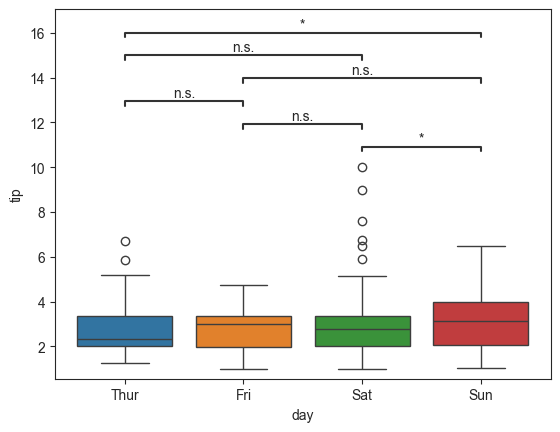

In [6]:
tips_plot.boxplot(test='mannu', value_col='tip', group_col='day')

## Modifying Annotations

The annotations for the plot can be modified. For readability, the non-significant groups will not be annotated. This will be done by passing in the **pairs** parameters. Based on the order of the pairs, this could also change the order of the group. As I prefer to have the typical Sun-Sat week order, I have made the group order accordingly.  

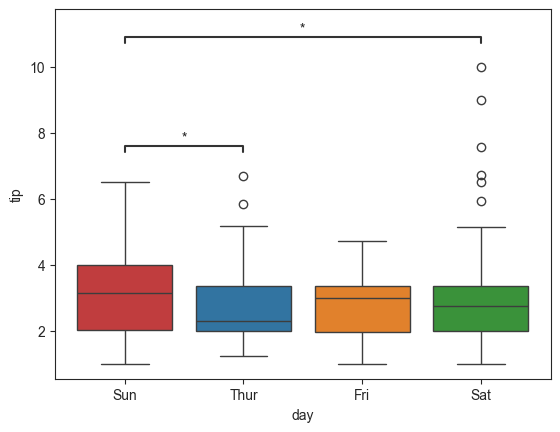

In [7]:
pairs = [('Thur', 'Sun'), ('Sat', 'Sun')]
group_order = ['Sun', 'Thur', 'Fri', 'Sat']

tips_plot.boxplot(test='mannu', value_col='tip', group_col='day', group_order=group_order, pairs=pairs)

The annotations can also be modified. The order of the annotation must match the order of the statistics table. This can be checked by passing the **return_df** parameter. 

(     A     B   U-val     p-val significance       RBC      CLES
 1  Sun  Thur  2956.5  0.010006            *  0.254881  0.627441
 0  Sun   Sat  3960.0  0.029497            *  0.197822  0.598911,
 <statannotations.Annotator.Annotator at 0x16060e6a0>)

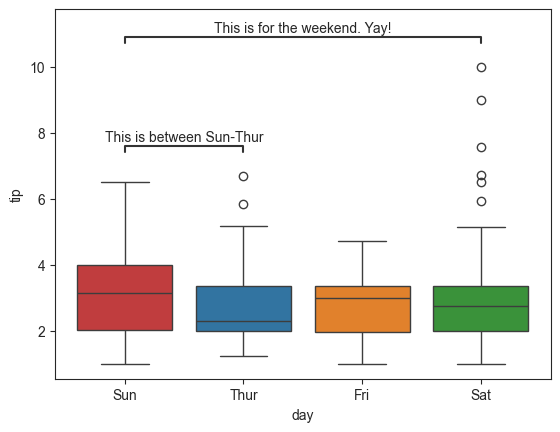

In [8]:
pvalue_label = ['This is between Sun-Thur', 'This is for the weekend. Yay!']

tips_plot.boxplot(test='mannu', value_col='tip', group_col='day', group_order=group_order, pairs=pairs,
                  pvalue_label=pvalue_label, return_df=True)

## Adding Title and Changing Fonts 

Keeping visual information consistent and color coordinated is important for a project. The basic Seaborn font style rarely matches the style of a project (at least in my experience). This can be easily fixed using the Matplotlib customization features. These customizations should be called **after** generating the annotated plots.

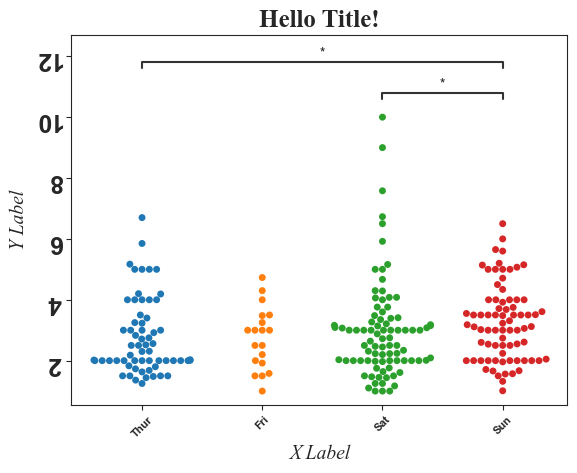

In [9]:
title = 'Hello Title!'
tips_plot.swarmplot(test='mannu', value_col='tip', group_col='day', pairs=pairs)

# Set Ticks
plt.xticks(fontname="Arial", fontsize=8, fontweight='bold', rotation=45)
plt.yticks(fontname="Arial", fontsize=18, fontweight='bold', rotation=180)

# Set Title and Labels
plt.xlabel("X Label", fontname='Times New Roman', fontstyle='italic', fontsize=14)
plt.ylabel("Y Label", fontname='Times New Roman', fontstyle='italic', fontsize=14)
plt.title(title, fontname='Times New Roman', fontweight='bold', fontsize=18)
plt.show()

That figure may look garish, but a lot of customizations were demoed! Many customizations were passed using matplotlib and additional args or kwargs can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html).

## Error Bars

As of this writing, Statannotations does not support Seaborn ≥0.12. As a result, the error bars between plots are inconsistent.  

The boxplot can be modified by passing in the **whis** parameter. This will modify the bars of the box plot. Points outside the bars are outliers. By default, this is set to 1.5.

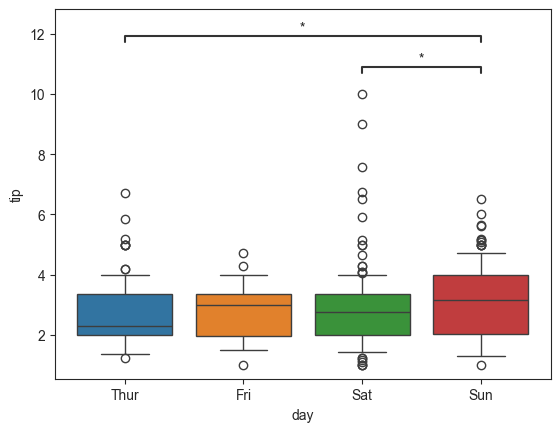

In [10]:
tips_plot.boxplot(test='mannu', value_col='tip', group_col='day', pairs=pairs, whis=0.5)

In contrast, the barplot contains a few more options for modifying its error bars. By default, the confidence interval, or the **ci** parameter, is set to **"sd"** or standard deviation. However, this can be changed by passing in an integer. The **capsize** parameter will determine the size of the ends. Additionally, Seaborn contains **kwargs that can further modify the errorbars. We will use **errcolor** as an example, which is part of the **kwarg for the py50 barplot. 

**Testing on my machine has not shown any issues with error bars on bar plot**

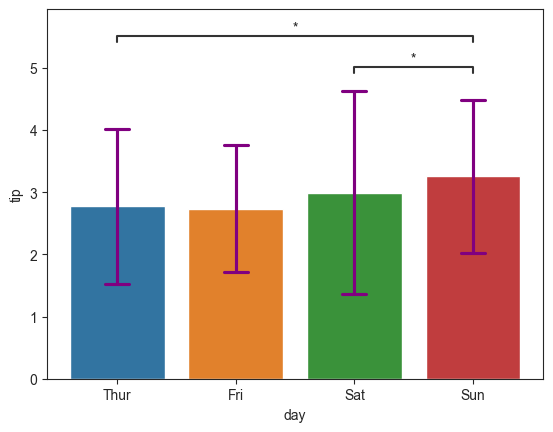

In [11]:
tips_plot.barplot(test='mannu', value_col='tip', group_col='day', pairs=pairs, errorbar="sd", capsize=0.2,
                  errcolor='purple')

## Color Palette

Color coding groups or data is important in communicating results. We can use that conditions into the **palette** parameter. This can be a string or a list of colors. The colors can be a name or a list of hex codes. 

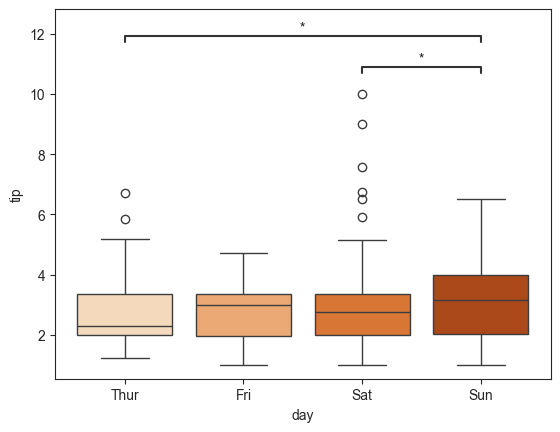

In [12]:
# Palette as a string
palette = 'Oranges'
tips_plot.boxplot(test='mannu', value_col='tip', group_col='day', pairs=pairs, palette=palette)

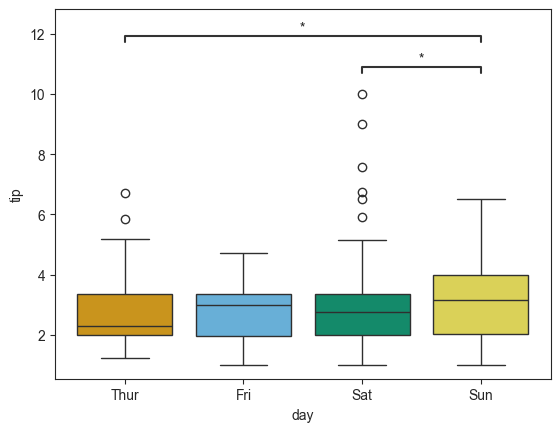

In [13]:
# Palette as a list
palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442"]  # Colorblind palette

tips_plot.boxplot(test='mannu', value_col='tip', group_col='day', pairs=pairs, palette=palette)

## Reorder group
The groups can also be reordered. Keep in mind that if this is done, the annotations will also be moved modified accordingly. Let us order the group by the days of the week. 

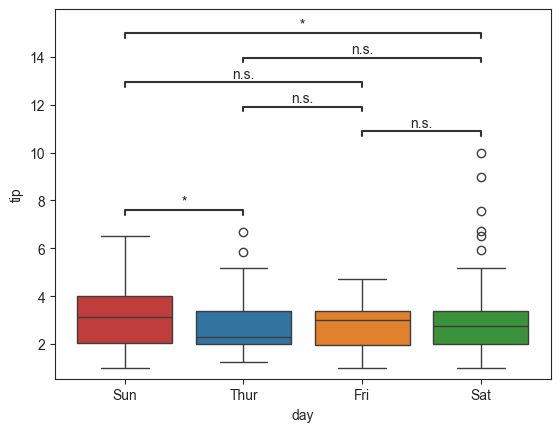

In [14]:
group_order = ['Sun', 'Thur', 'Fri', 'Sat']

tips_plot.boxplot(test='mannu', value_col='tip', group_col='day', group_order=group_order)

## Moving Annotations Out of the Plot

Depending on the dataset and the type of plot used, the annotations may interfere with the plot. The annotations can be moved "away" from the plot by passing the **loc** parameter. However, using this parameter will itnerfere with the plot title. 

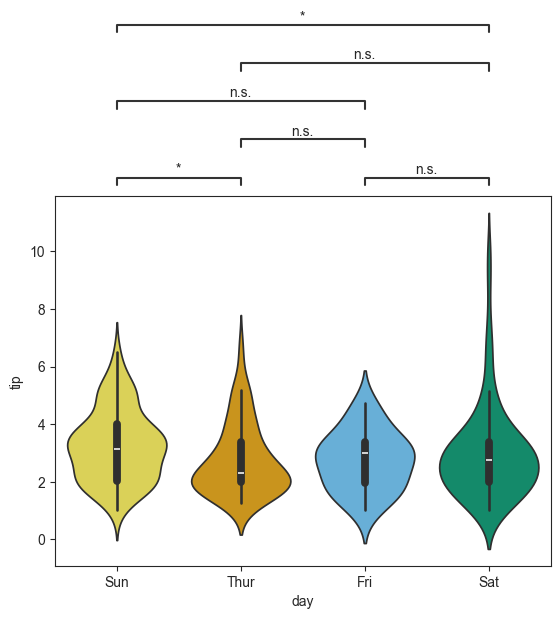

In [15]:
tips_plot.violinplot(test='mannu', value_col='tip', group_col='day', group_order=group_order, palette=palette,
                     loc="outside")

This can also be useful if the figure is rotated. Rotation of the figure is done using the **orient** parameter. 

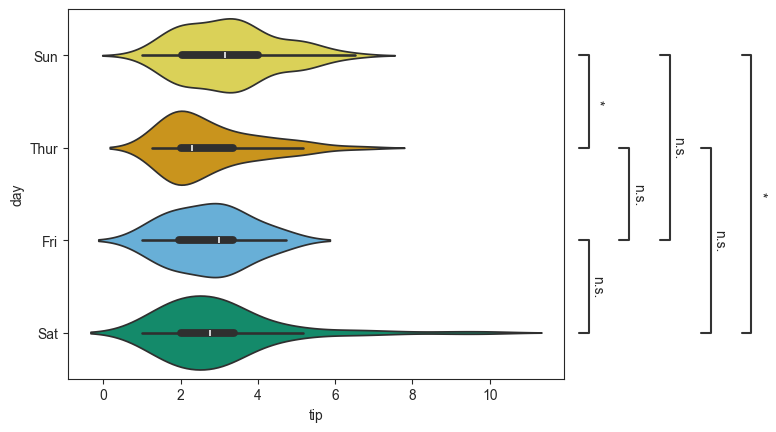

In [16]:
tips_plot.violinplot(test='mannu', value_col='tip', group_col='day', group_order=group_order, palette=palette,
                     loc="outside", orient='h')

## Annotations with subgroups
When including subgroups will modify the hues of box. This can be more complicated as there are more elements on the plot. It will also reduce the readability of the plot. Luckily if the group_col and subgroup_col is set to 'day' and 'smoker', respectively, only three groups show significance. Only those groups will be annotated. 

Passing a color palette will change the hues of the groups. In this case, the plot will be color coded to the smoker group.  

Text(0.5, 1.0, 'Basic Plot with Subgroup Hues!')

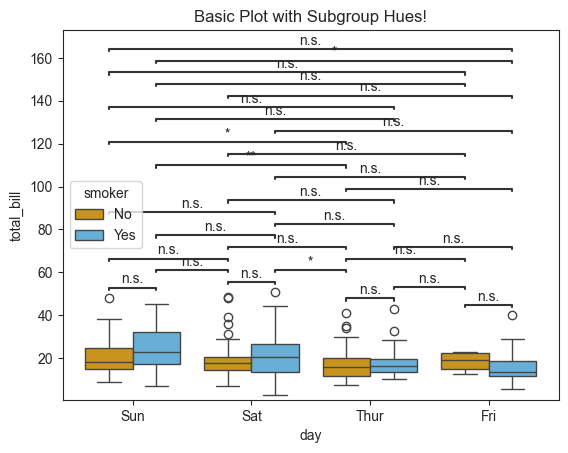

In [17]:
title = 'Basic Plot with Subgroup Hues!'
palette = ["#E69F00", "#56B4E9"]

tips_plot.boxplot(test='mannu', value_col='total_bill', group_col='day', subgroup_col='smoker', palette=palette)

plt.title(title)

That looks... interesting. For the given dataset, there are a lot of Non-Significant groups. Their presence has cluttered the graph and reduced its readability. The n.s. labels can be quickly removed using the "hide_ns" boolean parameter. 

Text(0.5, 1.0, 'Plot with no n.s. groups!')

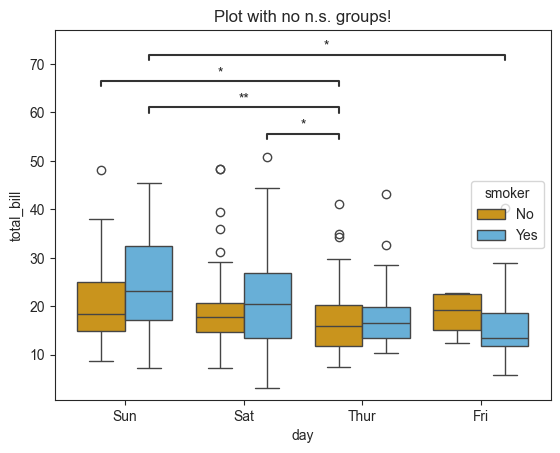

In [18]:
title = 'Plot with no n.s. groups!'

tips_plot.boxplot(test='mannu', value_col='total_bill', group_col='day', subgroup_col='smoker',
                                palette=palette, hide_ns=True)

plt.title(title)

Pairs to annotate on teh plot can also be selected manually. Here only the groups showing significant differences are annotated. 

Text(0.5, 1.0, 'Plot with Subgroup Changes the Hues!')

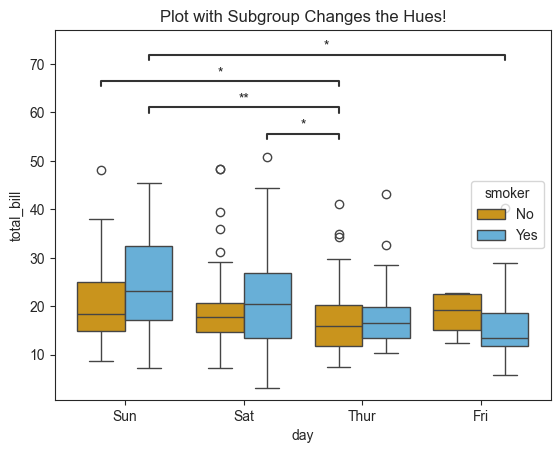

In [19]:
# Pairs to annotate
pairs = [
    (('Sun', 'No'), ('Thur', 'No')),
    (('Sat', 'Yes'), ('Thur', 'No')),
    (('Thur', 'No'), ('Sun', 'Yes')),
    (('Sun', 'Yes'), ('Fri', 'Yes'))
]

title = 'Plot with Subgroup Changes the Hues!'

tips_plot.boxplot(test='mannu', value_col='total_bill', group_col='day', subgroup_col='smoker', pairs=pairs,
                  palette=palette, return_df=True)

plt.title(title)

Finally, the groups on the X-axis can be organized in a specific manner. Here the data will be organized into the traditional Sun-Sat order. 

Text(0.5, 1.0, 'Plot with Subgroup Changes the Hues!')

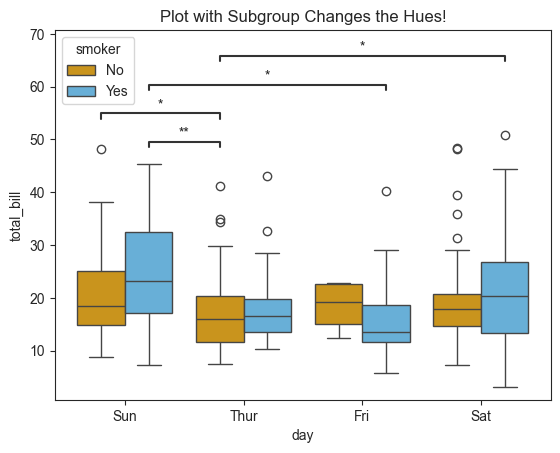

In [20]:
title = 'Plot with Subgroup Changes the Hues!'

# Group order
order = ['Sun', 'Thur', 'Fri', 'Sat']

tips_plot.boxplot(test='mannu', value_col='total_bill', group_col='day', subgroup_col='smoker', pairs=pairs,
                  palette=palette, group_order=order)

plt.title(title)

## Figure Legend Placement
With the use of the subgroup, the plot will handle this input as the hue. As a result, a figure legend will be generated. Depending on the size of the data or parameter input, the legend may be located in a position obscuring the plot. This can be modified using plt.legend() as follows: 

Text(0.5, 1.0, 'Plot with Subgroup Changes the Hues!')

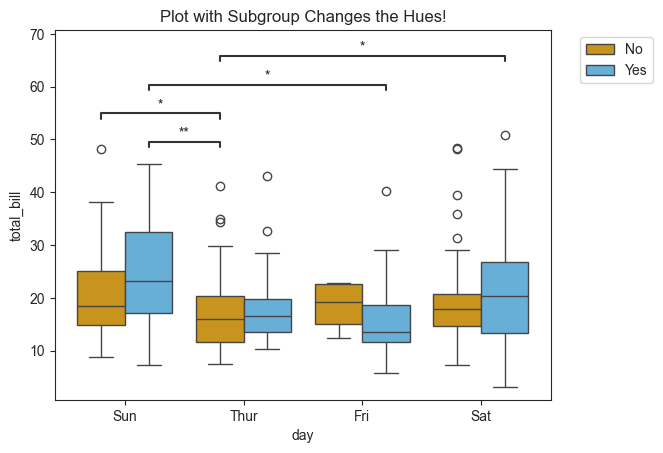

In [21]:
tips_plot.boxplot(test='mannu', value_col='total_bill', group_col='day', subgroup_col='smoker', pairs=pairs,
                  palette=palette, group_order=order)

plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1))
plt.title(title)

# Plotting a Matrix of P Values

py50 also comes wrapped with [scikit-posthocs](https://github.com/maximtrp/scikit-posthocs). This requires a matrix of pvalues calculated from the py50.Stats module. The resulting heatmap will be generated based on the calculate matrix from the Stats module. 

In [22]:
example1 = tips_stats.get_mannu(value_col='tip', group_col='day')
example1

,A,B,U-val,p-val,significance,RBC,CLES
0,Sun,Sat,3960.0,0.029497,*,0.197822,0.598911
1,Sun,Thur,2956.5,0.010006,*,0.254881,0.627441
2,Sun,Fri,910.5,0.079741,n.s.,0.261080,0.630540
3,Sat,Thur,2907.5,0.417663,n.s.,0.078050,0.539025
4,Sat,Fri,845.0,0.881937,n.s.,0.022384,0.511192
5,Thur,Fri,561.0,0.758381,n.s.,-0.047538,0.476231


In [23]:
matrix1 = Stats.get_p_matrix(data=example1, test='mannu', )
matrix1

,Fri,Sat,Sun,Thur
Fri,1.000000,0.881937,0.079741,0.758381
Sat,0.881937,1.000000,0.029497,0.417663
Sun,0.079741,0.029497,1.000000,0.010006
Thur,0.758381,0.417663,0.010006,1.000000


(<Axes: title={'center': 'A Matrix of P Values!'}>,
 <matplotlib.colorbar.Colorbar at 0x16345c7c0>)

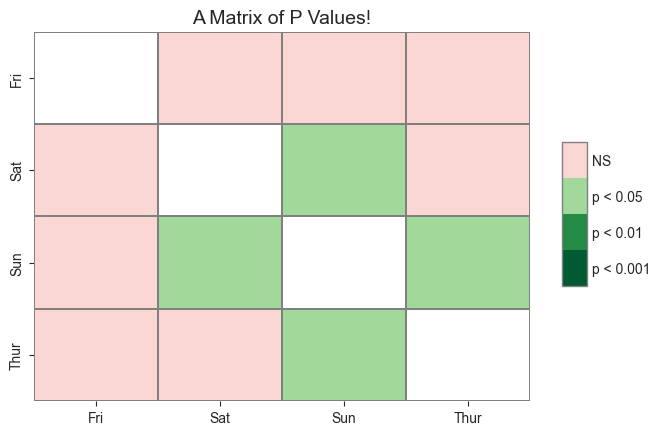

In [24]:
title = 'A Matrix of P Values!'
plot_matrix_1 = Plots(matrix1)
plot_matrix_1.p_matrix(title=title)

That looks good. However, the figure can be modified further. We will reorder the groups to follow the typical Sun-Sat week format and use a blind color palette.

First, the matrix from the Stats module must be reordered. This can be done by passing in a list of the groups. If the user prefers the groups to be in alphabetical order, then the **alpha** can be passed instead of a list. 

The **palette** parameter is modified by passing in a list of colors. This can be a list of color names or a list of hexcodes. 

(<Axes: title={'center': 'A Matrix of P Values!'}>,
 <matplotlib.colorbar.Colorbar at 0x163513cd0>)

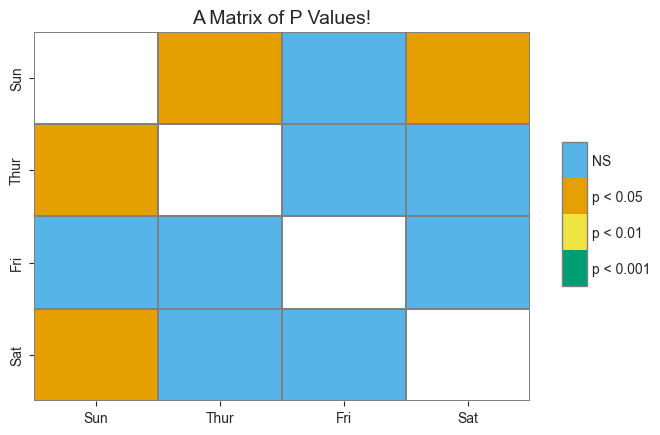

In [25]:
order = ['Sun', 'Thur', 'Fri', 'Sat']
palette = ["1", "#56B4E9", "#009E73", "#F0E442", "#E69F00"]

matrix2 = Stats.get_p_matrix(example1, test='mannu', order=order)

plot_matrix_2 = Plots(matrix2)
plot_matrix_2.p_matrix(title=title, cmap=palette)

# A Matrix From a Cluttered Plot

Previously, we generated a plot with subgroup annotations. This modifies the hue. Adding all the annotations on the plot vastly reduces its readability.

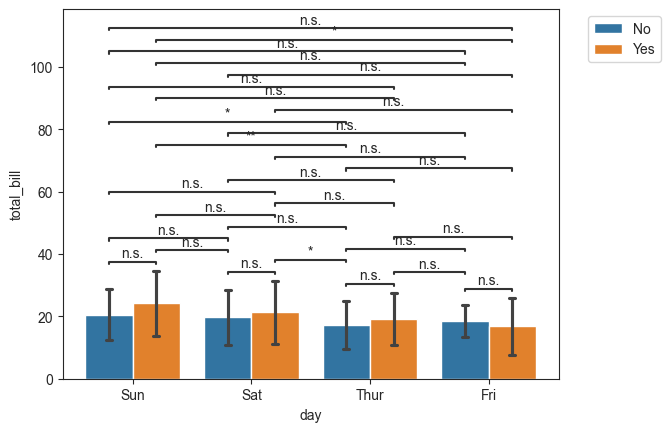

In [26]:
tips_plot.barplot(test='mannu', value_col='total_bill', group_col='day', subgroup_col='smoker')
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1))

Fortunately, the pvalues can be drawn as a matrix.

Like before, the statistics must be calculated first using the **get_X** where **X** is the specific statistic test. The output table is then converted into a matrix using the **get_p_matrix**. Finally, it can be plotted using the **Plot.p_matrix()** function. Steps can be seen below. 

In [27]:
example2 = tips_stats.get_mannu(value_col='total_bill', group_col='day', subgroup_col='smoker')
matrix3 = Stats.get_p_matrix(example2, test='mannu')
matrix3

,Sat-Yes,Fri-No,Fri-Yes,Sun-No,Sat-No,Thur-Yes,Thur-No,Sun-Yes
Sat-Yes,1.000000,0.720998,0.116979,0.823521,0.412393,0.563656,0.037041,0.262149
Fri-No,0.720998,1.000000,0.395118,0.683619,0.874077,0.964270,0.510998,0.286166
Fri-Yes,0.116979,0.395118,1.000000,0.051393,0.112359,0.151217,0.707217,0.018338
Sun-No,0.823521,0.683619,0.051393,1.000000,0.428422,0.392813,0.018167,0.191027
Sat-No,0.412393,0.874077,0.112359,0.428422,1.000000,0.635937,0.098890,0.084238
Thur-Yes,0.563656,0.964270,0.151217,0.392813,0.635937,1.000000,0.262565,0.075961
Thur-No,0.037041,0.510998,0.707217,0.018167,0.098890,0.262565,1.000000,0.009704
Sun-Yes,0.262149,0.286166,0.018338,0.191027,0.084238,0.075961,0.009704,1.000000


(<Axes: title={'center': 'A Matrix of P Values with Subgroup Changes!'}>,
 <matplotlib.colorbar.Colorbar at 0x163725550>)

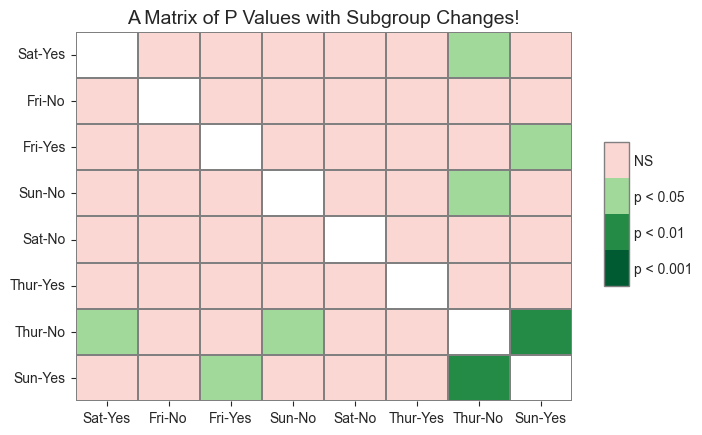

In [28]:
title = 'A Matrix of P Values with Subgroup Changes!'
plot_matrix_3 = Plots(matrix3)
plot_matrix_3.p_matrix(title=title)

Looks good. But as seen above, I prefer the data to be organized better. This can be done by passing in a list of the groups in a specified order. Because this dataset has more groups, it will be alphabetized instead. This will be done by passing in the **"alpha** into the order parameter.  

(<Axes: title={'center': 'A Matrix of P Values with Groups in Alphabetical Order'}>,
 <matplotlib.colorbar.Colorbar at 0x1637eebe0>)

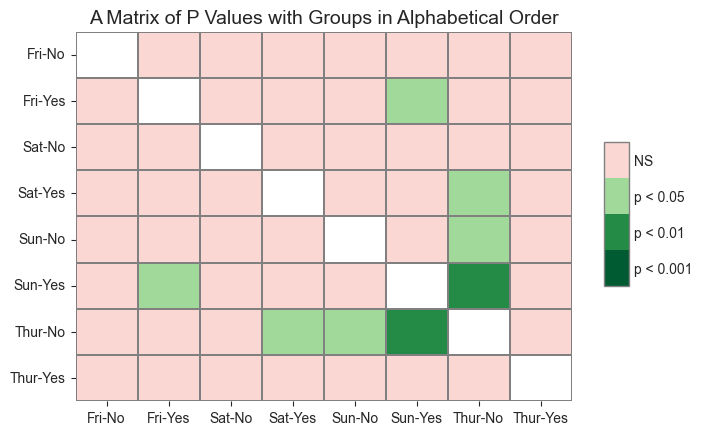

In [29]:
title = 'A Matrix of P Values with Groups in Alphabetical Order'

matrix4 = Stats.get_p_matrix(example2, test='mannu', order='alpha')
plot_matrix_4 = Plots(matrix4)
plot_matrix_4.p_matrix(title=title)